In [1]:
import numpy as np
import scipy
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import math
from tqdm import tqdm

# modeling
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)
pd.set_option('display.min_rows', 100)
pd.set_option('display.max_colwidth', 100)
pd.set_option('display.max_seq_items', 100)
pd.set_option('display.width', 100)

In [25]:
df = pd.read_csv('Data/olist_dataset_clean.csv', index_col=0)

In [4]:
df.head()

,geolocation_lat,geolocation_lng,AC,AL,AM,AP,BA,CE,DF,ES,GO,MA,MG,MS,MT,PA,PB,PE,PI,PR,RJ,RN,RO,RR,RS,SC,SE,SP,TO,sao_paulo,medium_high_city,big_city,medium_low_city,rio_de_janeiro,small_city,unknown_city,frequency,recency,review_score,number_of_payment,revenue,boleto,credit_card,debit_card,not_defined,voucher,delivery_against_estimated,order_approved_timelapse,order_delivered_carrier_timelapse,order_delivered_customer_timelapse,order_estimated_delivery_timelapse,review_creation_timelapse_from_delivery,review_answer_timeslapse_from_review,order_purchase_day_Fri,order_purchase_day_Mon,order_purchase_day_Sat,order_purchase_day_Sun,order_purchase_day_Thu,order_purchase_day_Tue,order_purchase_day_Wed,order_purchase_mon_Apr,order_purchase_mon_Aug,order_purchase_mon_Dec,order_purchase_mon_Feb,order_purchase_mon_Jan,order_purchase_mon_Jul,order_purchase_mon_Jun,order_purchase_mon_Mar,order_purchase_mon_May,order_purchase_mon_Nov,order_purchase_mon_Oct,order_purchase_mon_Sep,order_purchase_time_day_Dawn,order_purchase_time_day_Morning,order_purchase_time_day_Afternoon,order_purchase_time_day_Night,mean_price,mean_freight_value,product_name_lenght,product_description_lenght,product_photos_qty,orthodromique_distance_log,product_volume_log,product_weight_g_log
0,-23.618666,-46.639583,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,15,8.791667,5.000000,15,879.27,0.00,879.27,0.0,0.0,0.00,8.627778,2.200000,1.347222,4.011111,12.663889,545.400000,28.600000,0,4,2,2,0,4,3,0,4,0,0,0,4,1,0,2,1,2,1,0,2,1,12,45.601250,2931.14,40.266667,397.666667,2.200000,10.329890,8.375261,5.669621
1,-24.008923,-46.419125,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,9,182.833333,2.777778,9,1172.66,0.00,1172.66,0.0,0.0,0.00,8.333333,3.444444,5.055556,14.106481,22.472222,2277.888889,41.222222,3,3,0,0,1,2,0,0,0,3,4,1,0,0,0,0,0,0,1,0,5,2,2,71.489286,1546.38,45.428571,486.571429,1.428571,11.796966,8.538510,6.418344
2,-8.125613,-34.902732,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,89.125000,5.000000,7,1122.72,383.27,739.45,0.0,0.0,0.00,14.976190,6.714286,3.797619,16.785714,31.785714,3286.000000,27.142857,2,1,1,0,3,0,0,1,0,0,2,1,0,1,0,1,0,1,0,2,3,1,1,67.217500,2212.77,45.166667,235.166667,1.916667,14.559457,8.809665,7.128780
3,-23.965227,-46.343581,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,7,62.583333,5.000000,7,758.83,0.00,758.83,0.0,0.0,0.00,13.196429,0.000000,1.476190,4.244048,17.458333,308.428571,24.285714,0,2,0,0,2,2,1,0,0,2,0,1,0,1,0,0,1,1,1,2,1,2,2,73.800000,662.41,56.555556,319.222222,1.333333,12.162369,7.730991,6.528441
4,-18.953619,-49.458176,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,7,196.041667,5.000000,8,959.01,781.15,149.14,0.0,0.0,28.72,11.934524,10.000000,2.053571,13.315476,25.261905,342.285714,42.571429,1,2,0,0,1,1,2,0,0,3,1,1,0,0,0,0,2,0,0,0,3,3,1,89.912222,1048.60,45.333333,463.444444,3.777778,13.285825,9.179097,6.987210


In [31]:
df_test = df[['recency', 'revenue', 'review_score', 'review_creation_timelapse_from_delivery', 'mean_price', 'orthodromique_distance_log', 'product_volume_log', 'product_weight_g_log']]
df_alone = df_test[df['frequency'] <= 1].sample(frac=0.3, random_state=18)
df_test = df_test[df['frequency'] > 1]

In [36]:
df_lite = df[df['frequency'] > 1]

In [32]:
df_alone.shape

(26918, 8)

In [33]:
df_test = pd.concat([df_test, df_alone])

In [34]:
df_test.shape

(29672, 8)

In [37]:
df_lite = df_lite[['geolocation_lat', 'geolocation_lng', 'frequency', 'recency', 'number_of_payment', 'revenue', 'delivery_against_estimated', 'review_creation_timelapse_from_delivery', 'mean_price', 'orthodromique_distance_log', 'product_volume_log', 'product_weight_g_log']]

In [38]:
df_simple = df[['geolocation_lat', 'geolocation_lng', 'frequency', 'recency', 'number_of_payment', 'revenue', 'delivery_against_estimated', 'review_creation_timelapse_from_delivery', 'mean_price', 'orthodromique_distance_log', 'product_volume_log', 'product_weight_g_log']]

In [39]:
df_rfm = df[['frequency', 'recency', 'revenue']]

In [40]:
X = df_lite.values
scaler = StandardScaler()
scaler.fit(X)
Xt = df_test.values
scaler = StandardScaler()
scaler.fit(Xt)
Xt_std = scaler.transform(Xt)
Xs = df_simple.values
scaler = StandardScaler()
scaler.fit(Xs)
Xs_std = scaler.transform(Xs)
Xrfm = df_rfm.values
scaler = StandardScaler()
scaler.fit(Xrfm)
Xrfm_std = scaler.transform(Xrfm)

### KMeans

In [61]:
score = []
inertia = []
n_clu = range(2,20)
for i in tqdm(n_clu):
    model = KMeans(n_clusters=i)
    model.fit(X_std)
    score.append(silhouette_score(X_std, model.labels_))
    inertia.append(model.inertia_)

100%|██████████| 18/18 [00:09<00:00,  1.99it/s]


In [12]:
scores = []
inertias = []
n_clu = range(2,15)
for i in tqdm(n_clu):
    model = KMeans(n_clusters=i)
    model.fit(Xs_std)
    scores.append(silhouette_score(Xs_std, model.labels_))
    inertias.append(model.inertia_)

100%|██████████| 13/13 [32:42<00:00, 150.98s/it]


In [13]:
scorerfm = []
inertiarfm = []
n_clu = range(2,15)
for i in tqdm(n_clu):
    model = KMeans(n_clusters=i)
    model.fit(Xrfm_std)
    scorerfm.append(silhouette_score(Xrfm_std, model.labels_))
    inertiarfm.append(model.inertia_)

100%|██████████| 13/13 [32:17<00:00, 149.04s/it]


<IPython.core.display.Javascript object>


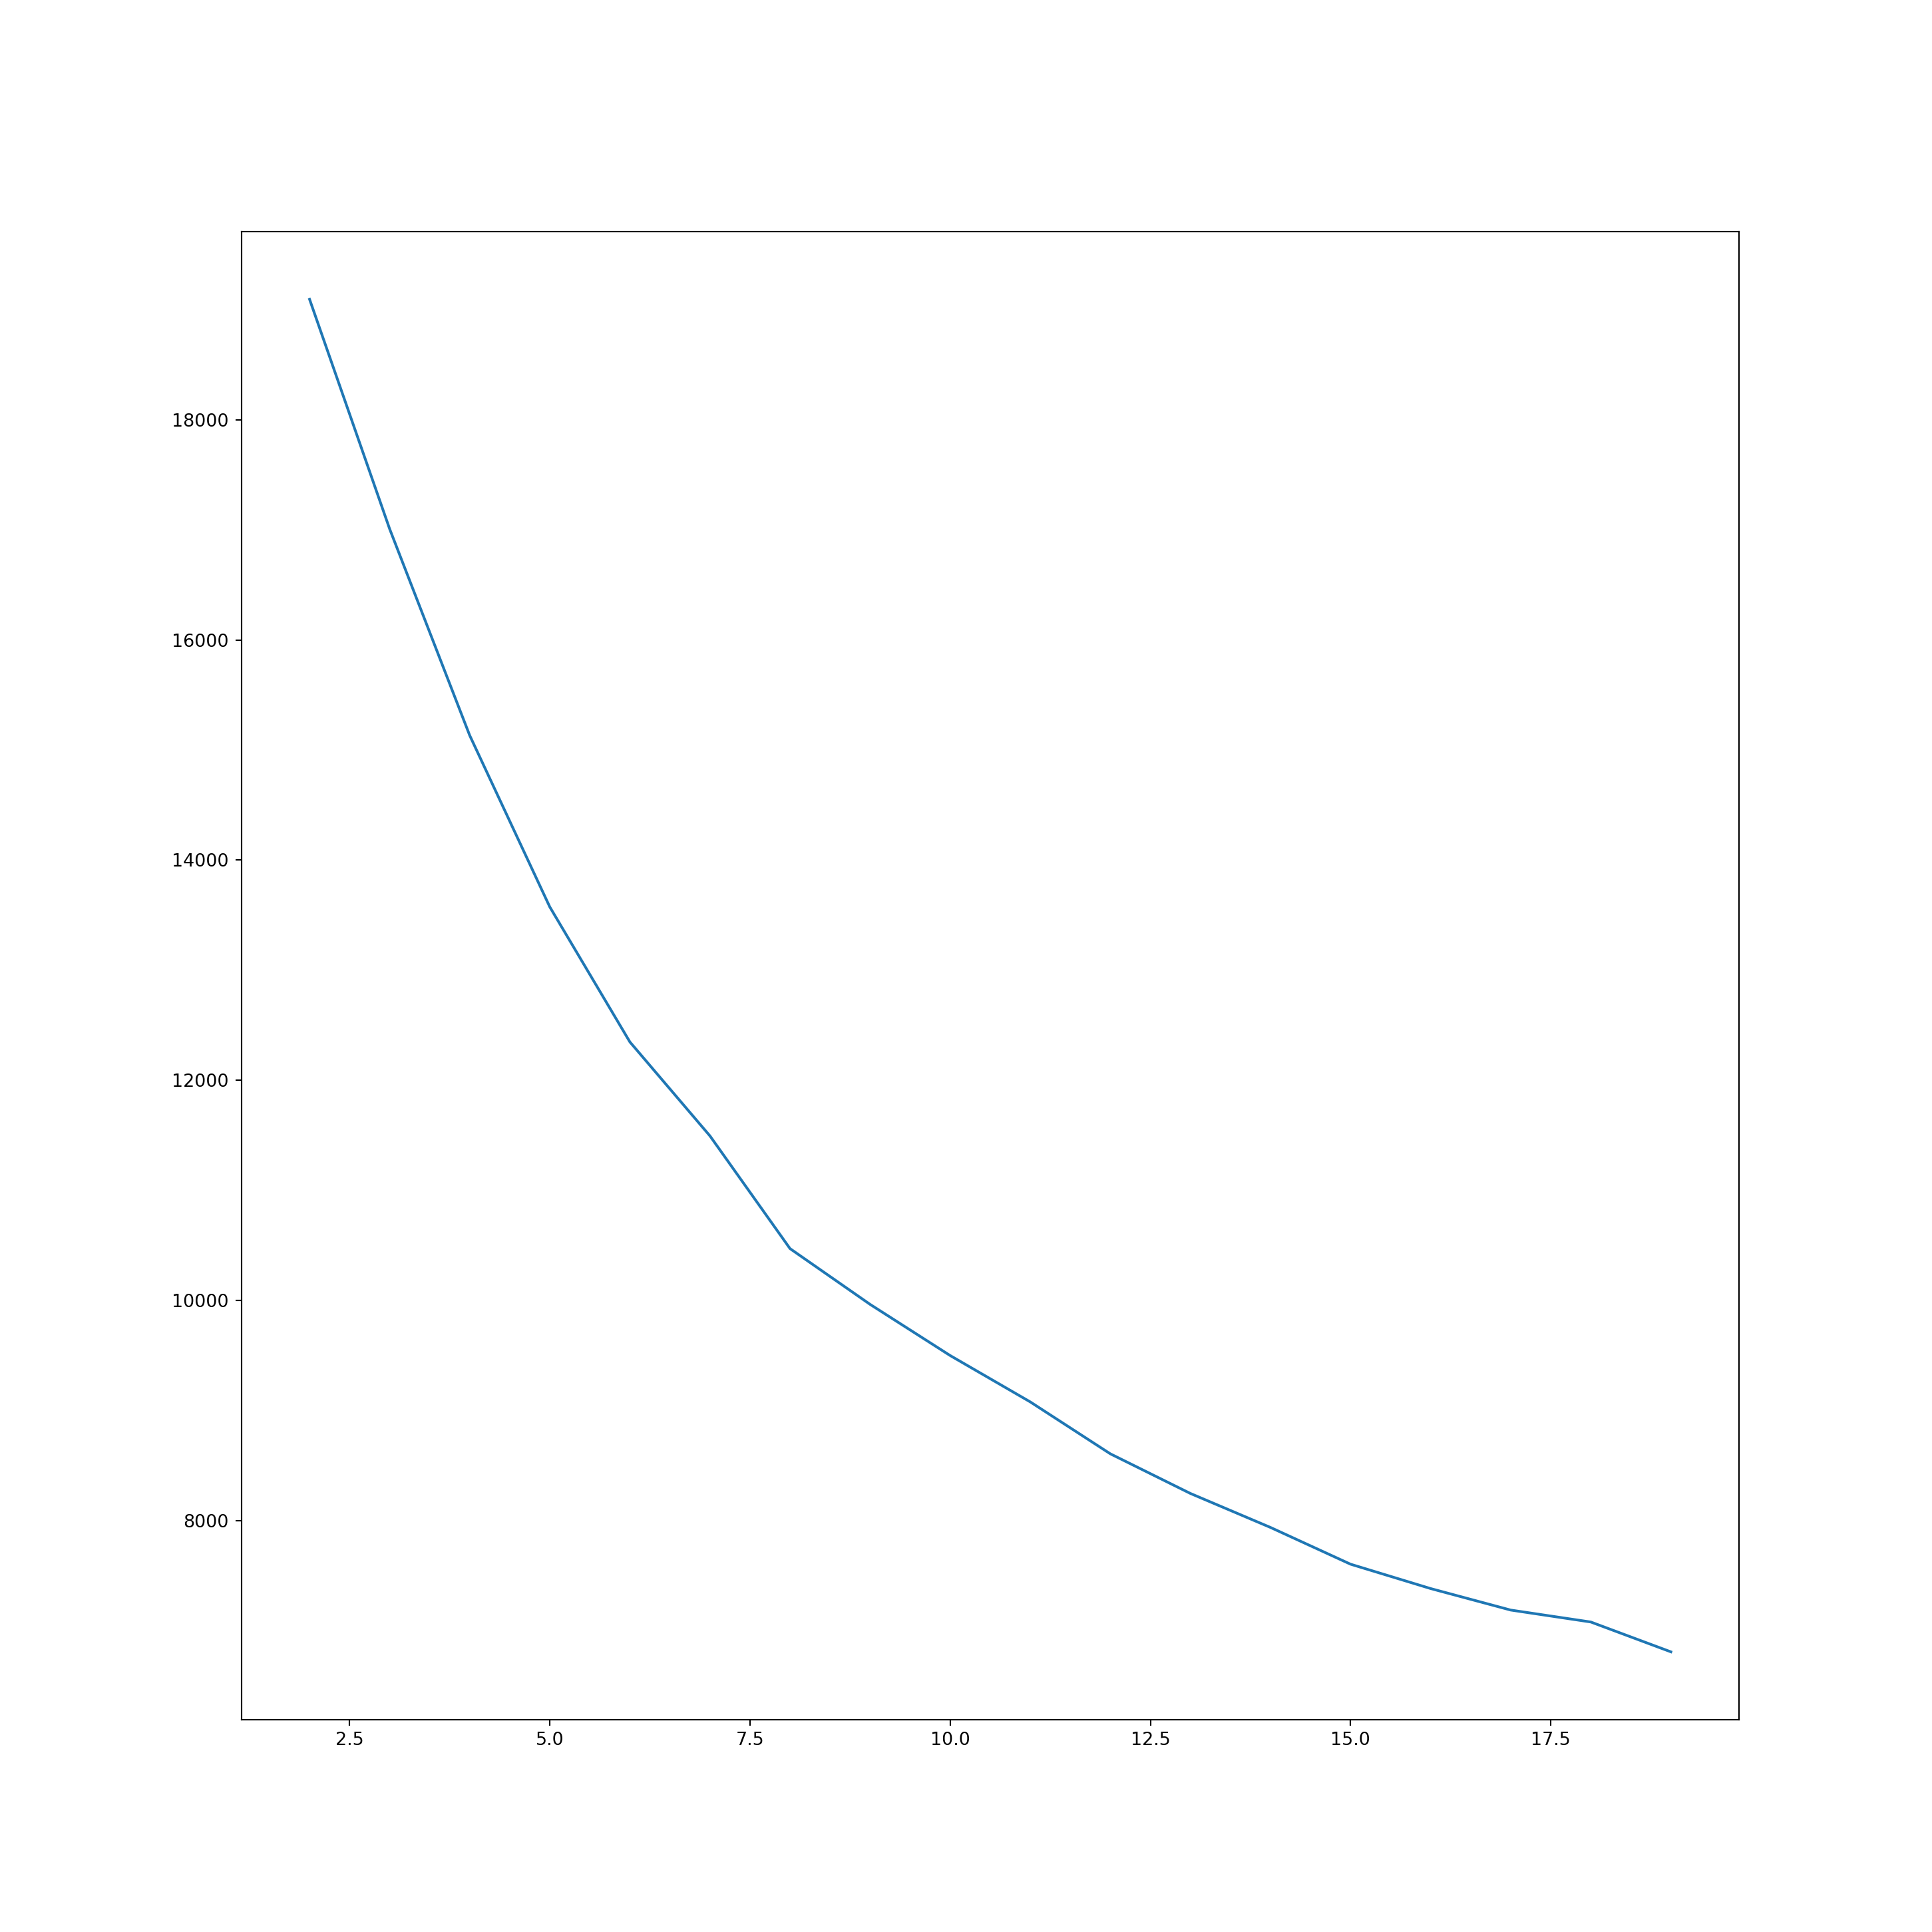

In [62]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, inertia)

<IPython.core.display.Javascript object>


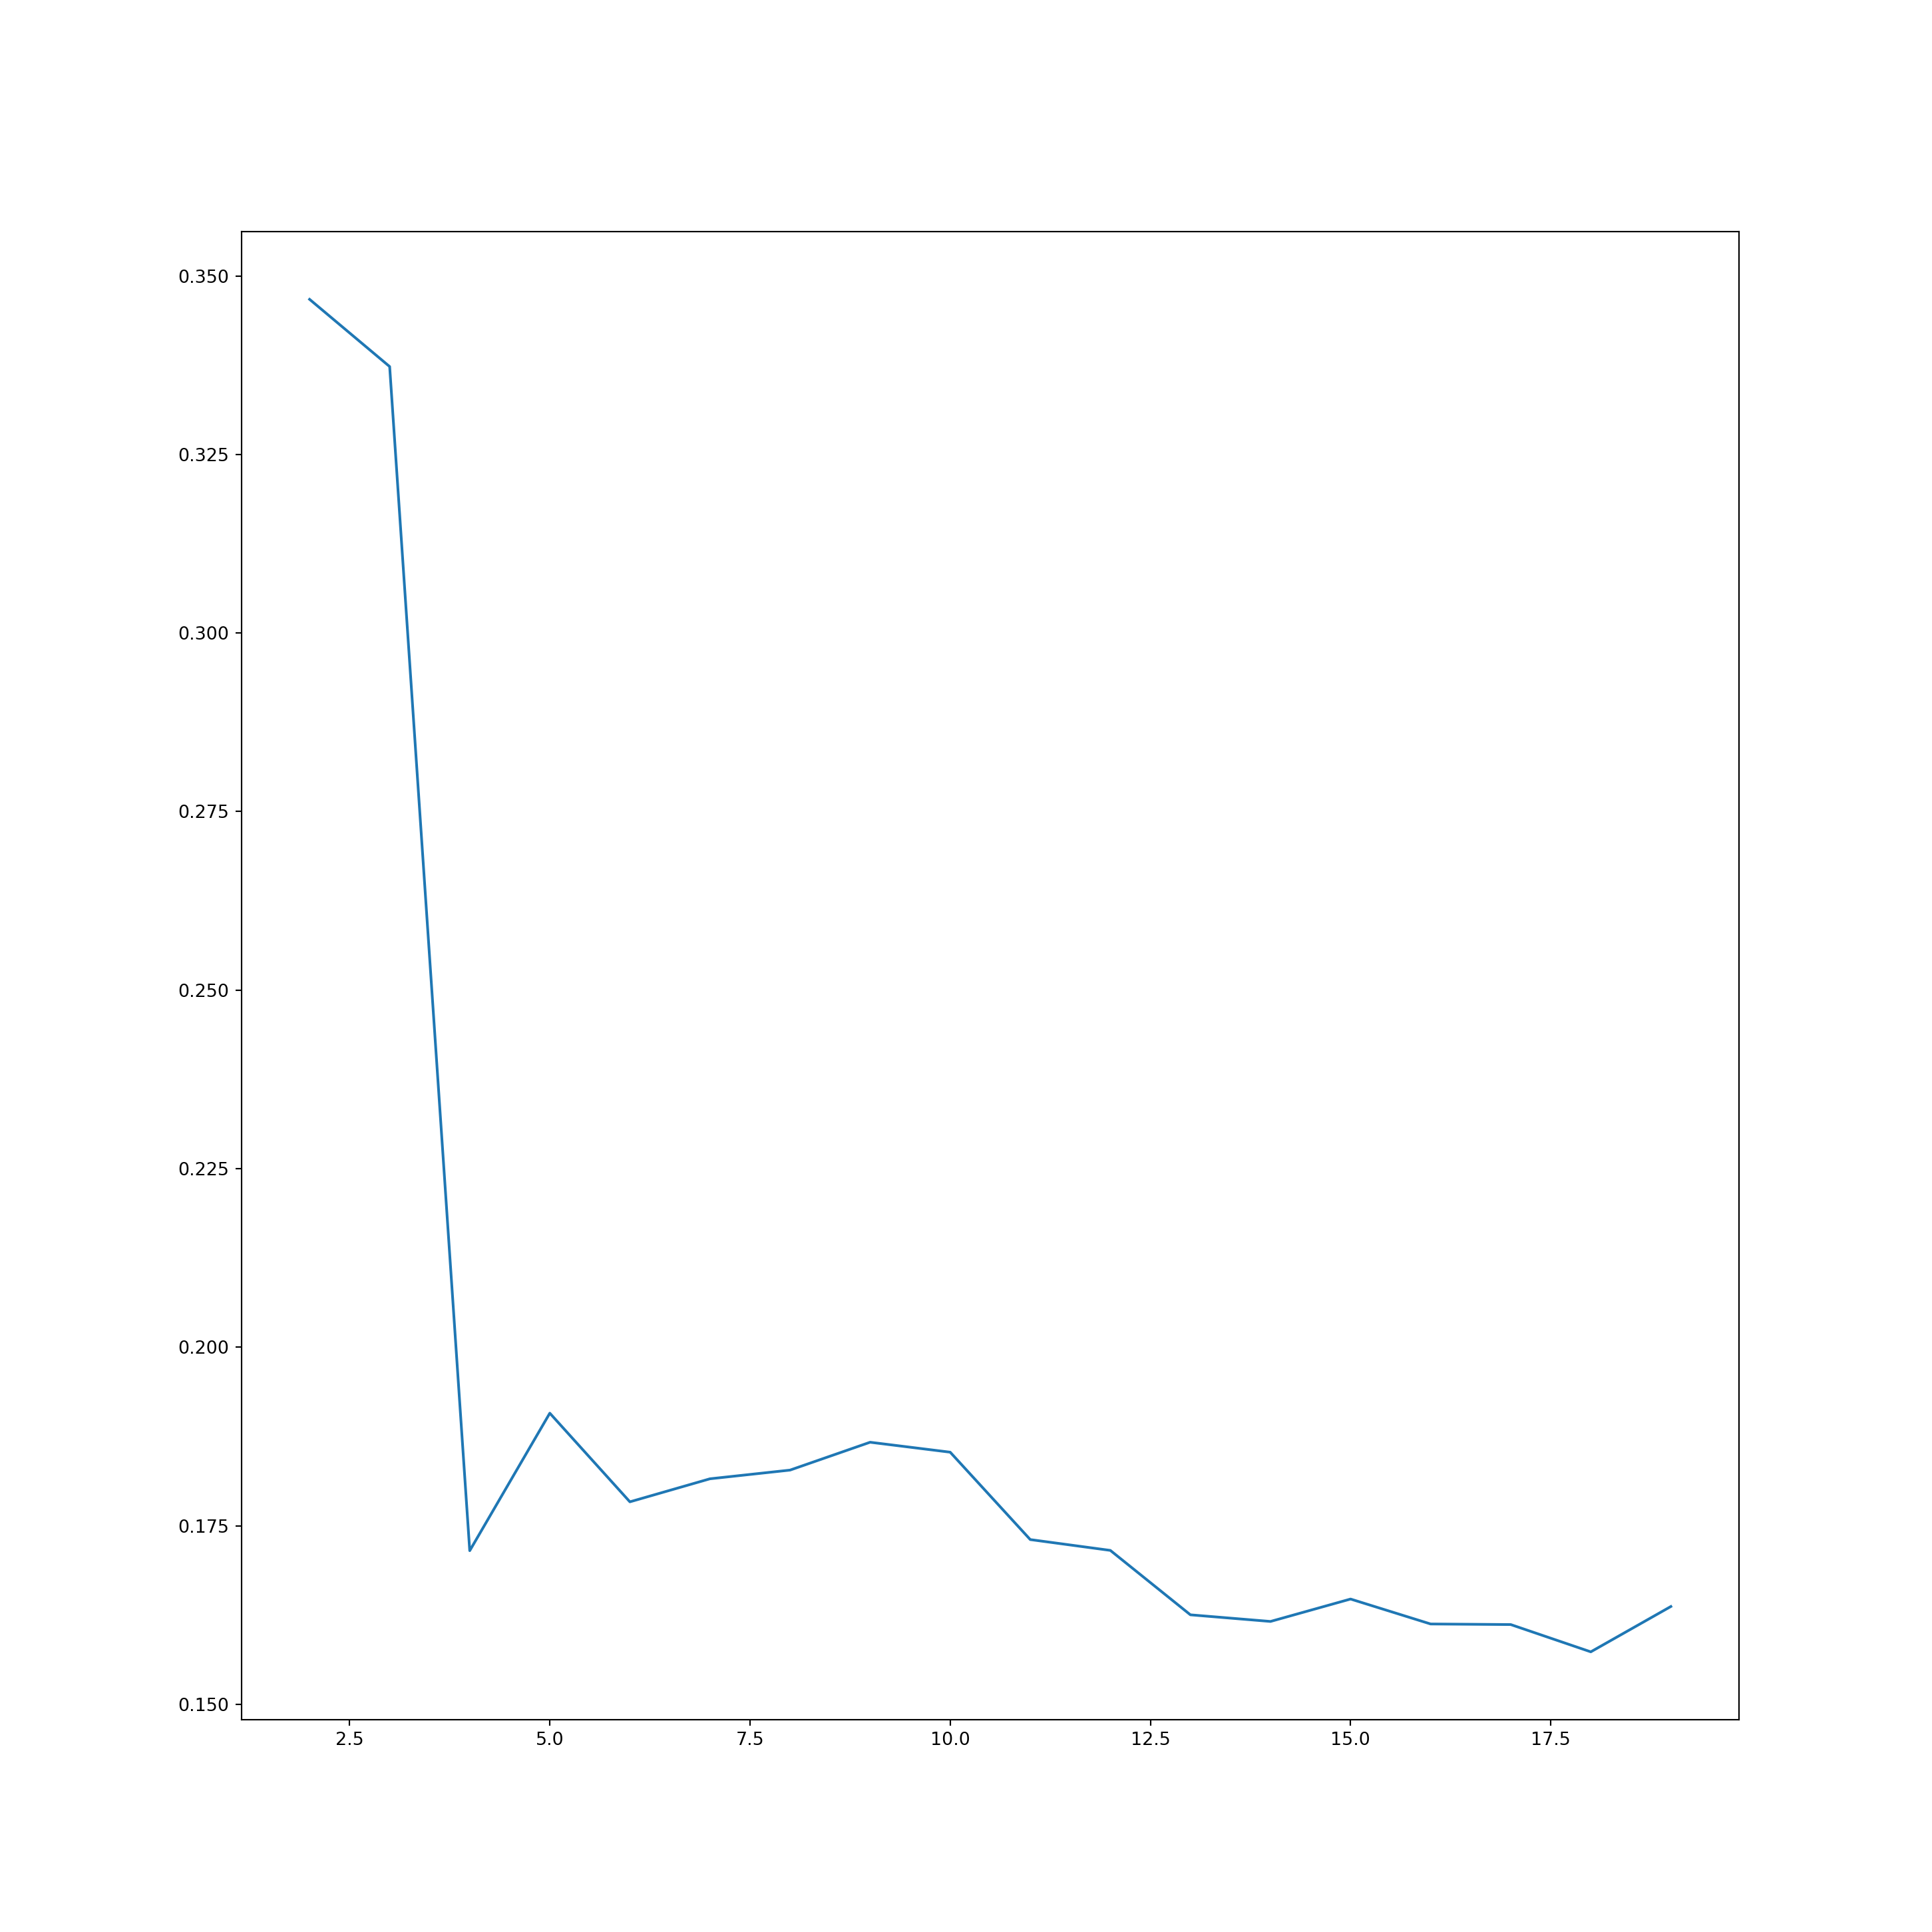

In [63]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, score)

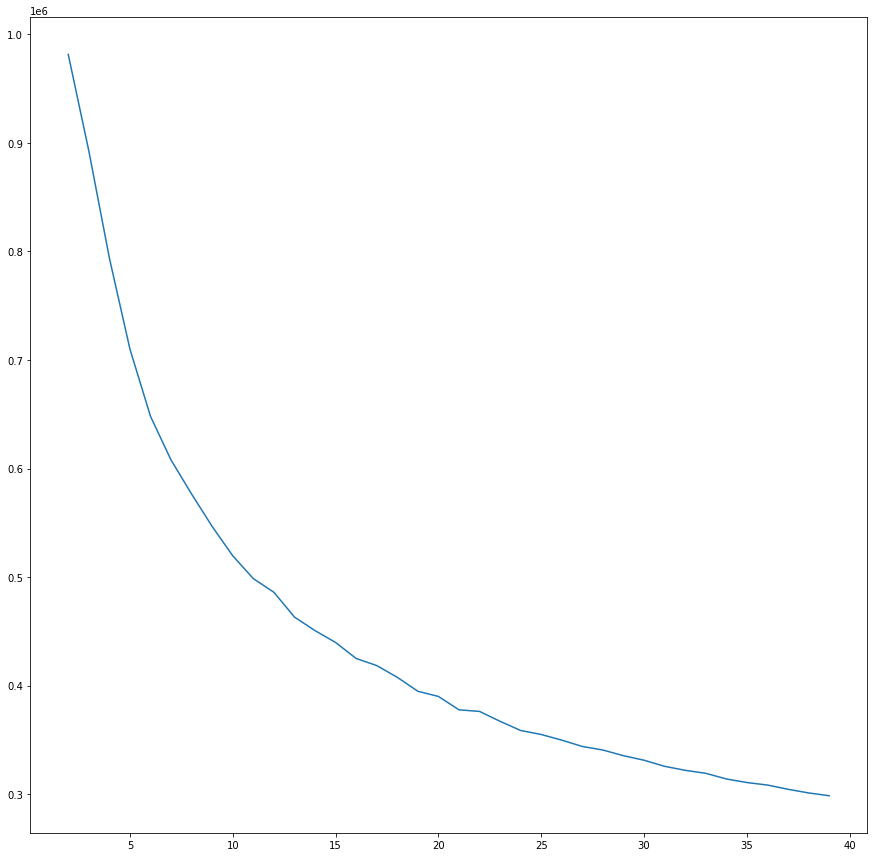

In [50]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, inertias)

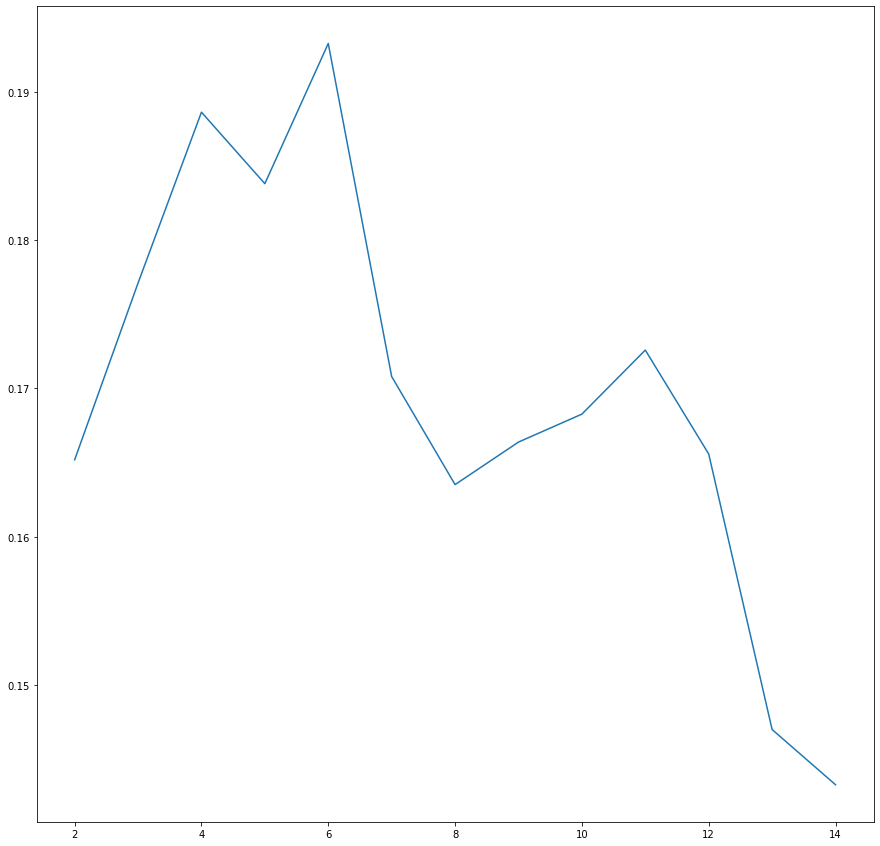

In [14]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, scores)

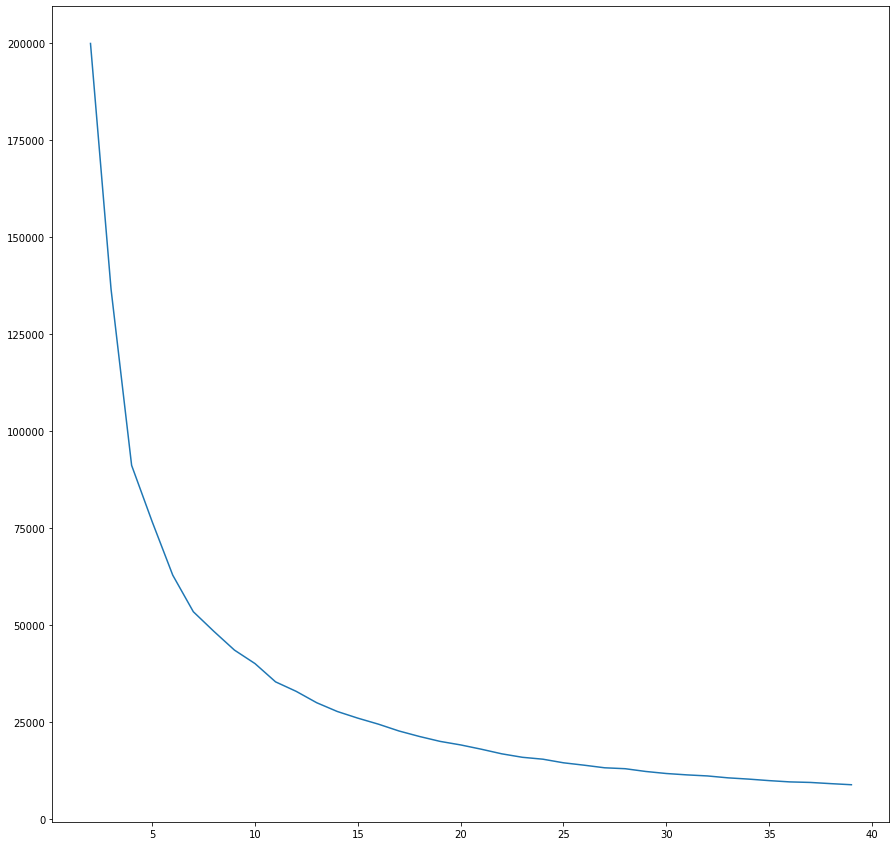

In [51]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, inertiarfm)

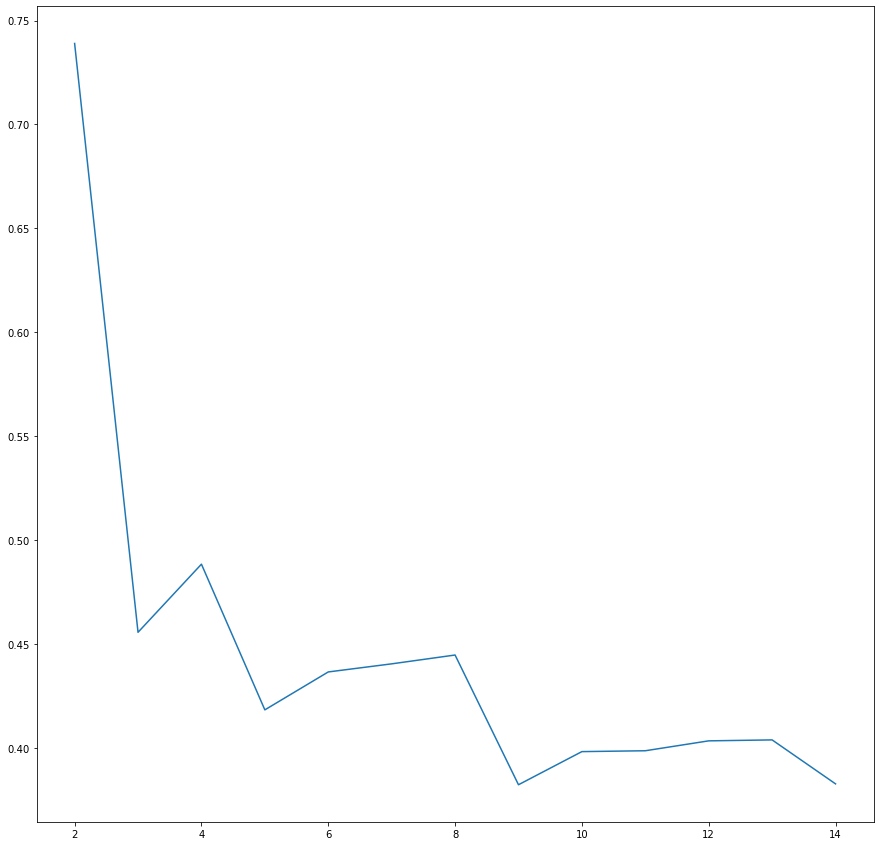

In [15]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, scorerfm)

In [64]:
model = KMeans(n_clusters=3)
model.fit(X_std)
silhouette_score(X_std, model.labels_)

0.3402230253711458

In [66]:
acp = PCA(n_components=2)
acp.fit(X_std)
X_reduce = acp.transform(X_std)

<IPython.core.display.Javascript object>


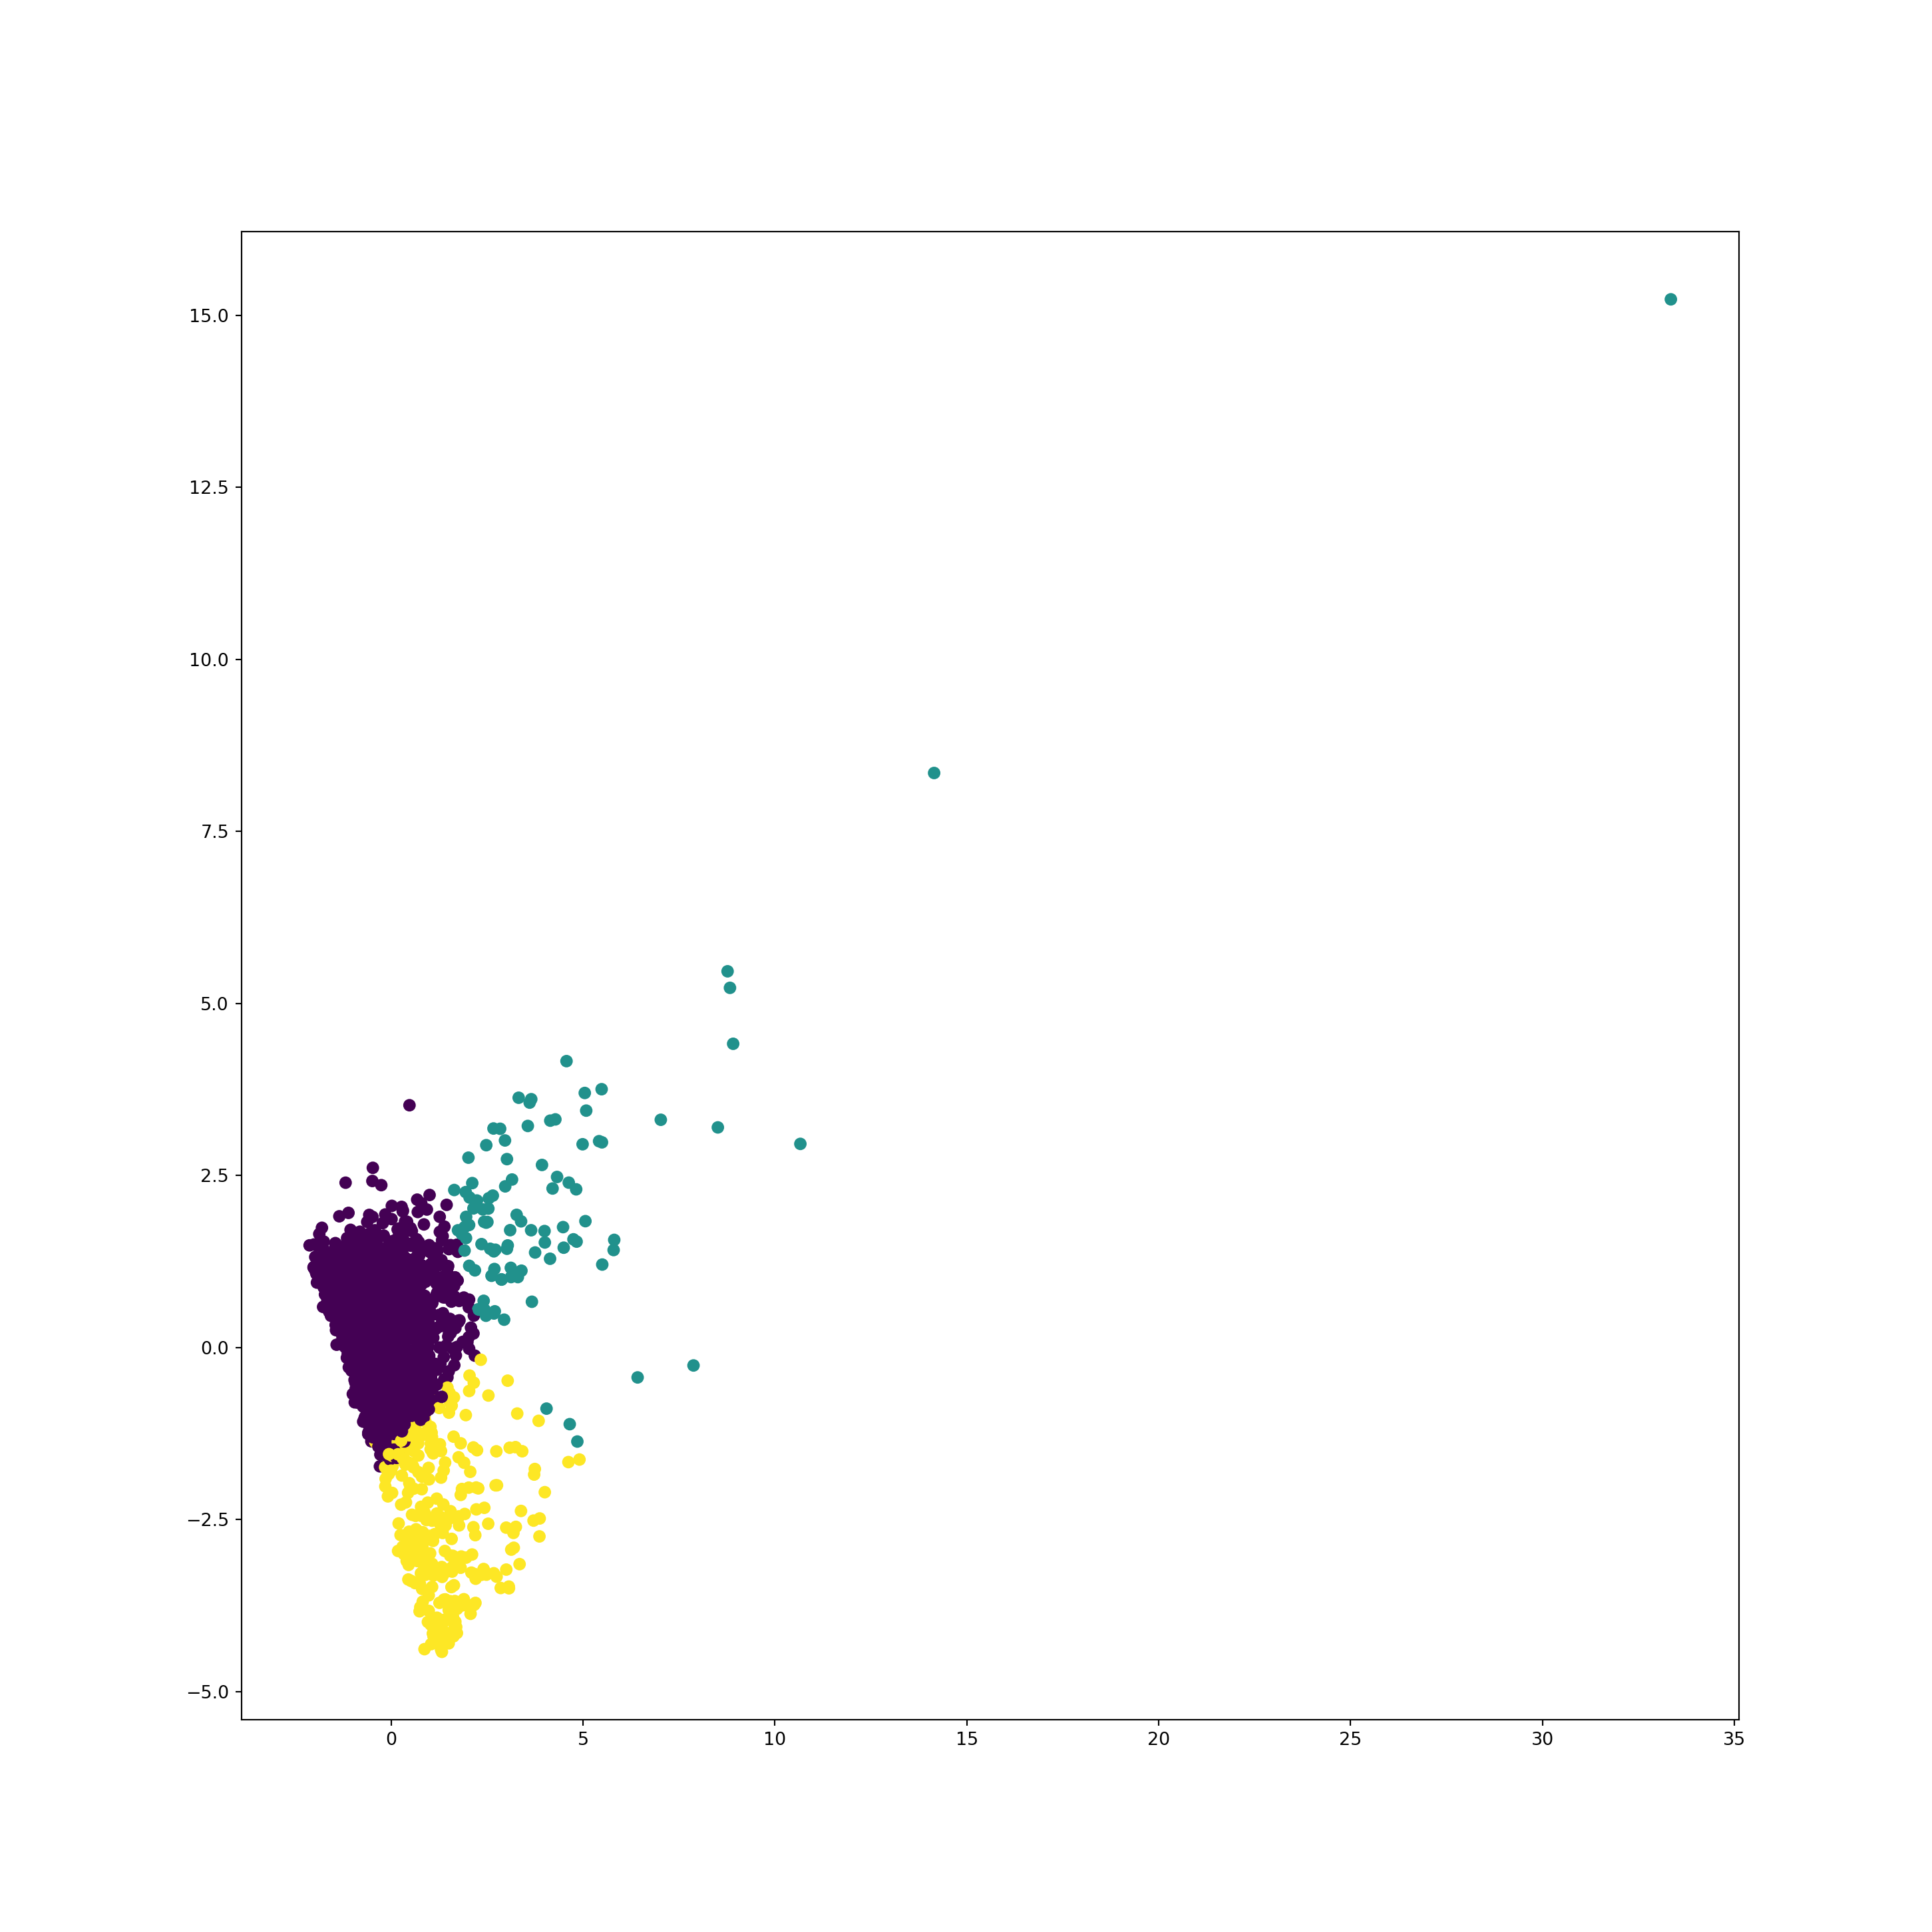

In [67]:
plt.figure(figsize=(15,15))
plt.scatter(X_reduce[:,0], X_reduce[:,1], c=model.labels_)

### DBSCAN

In [18]:
model = DBSCAN(eps=0.0001)
model.fit(X_std)

DBSCAN(eps=0.0001)

In [17]:
model.labels_

array([-1, -1, -1, ..., -1, -1, -1], dtype=int64)

In [19]:
silhouette_score(X_std, model.labels_)

ValueError: Number of labels is 1. Valid values are 2 to n_samples - 1 (inclusive)

### ACP

In [68]:
acp = PCA(n_components=3)
acp.fit(Xs_std)
Xs_reduce = acp.transform(Xs_std)

In [83]:
acp.explained_variance_ratio_.cumsum()

array([0.20361694, 0.34515151, 0.48052736])

<IPython.core.display.Javascript object>


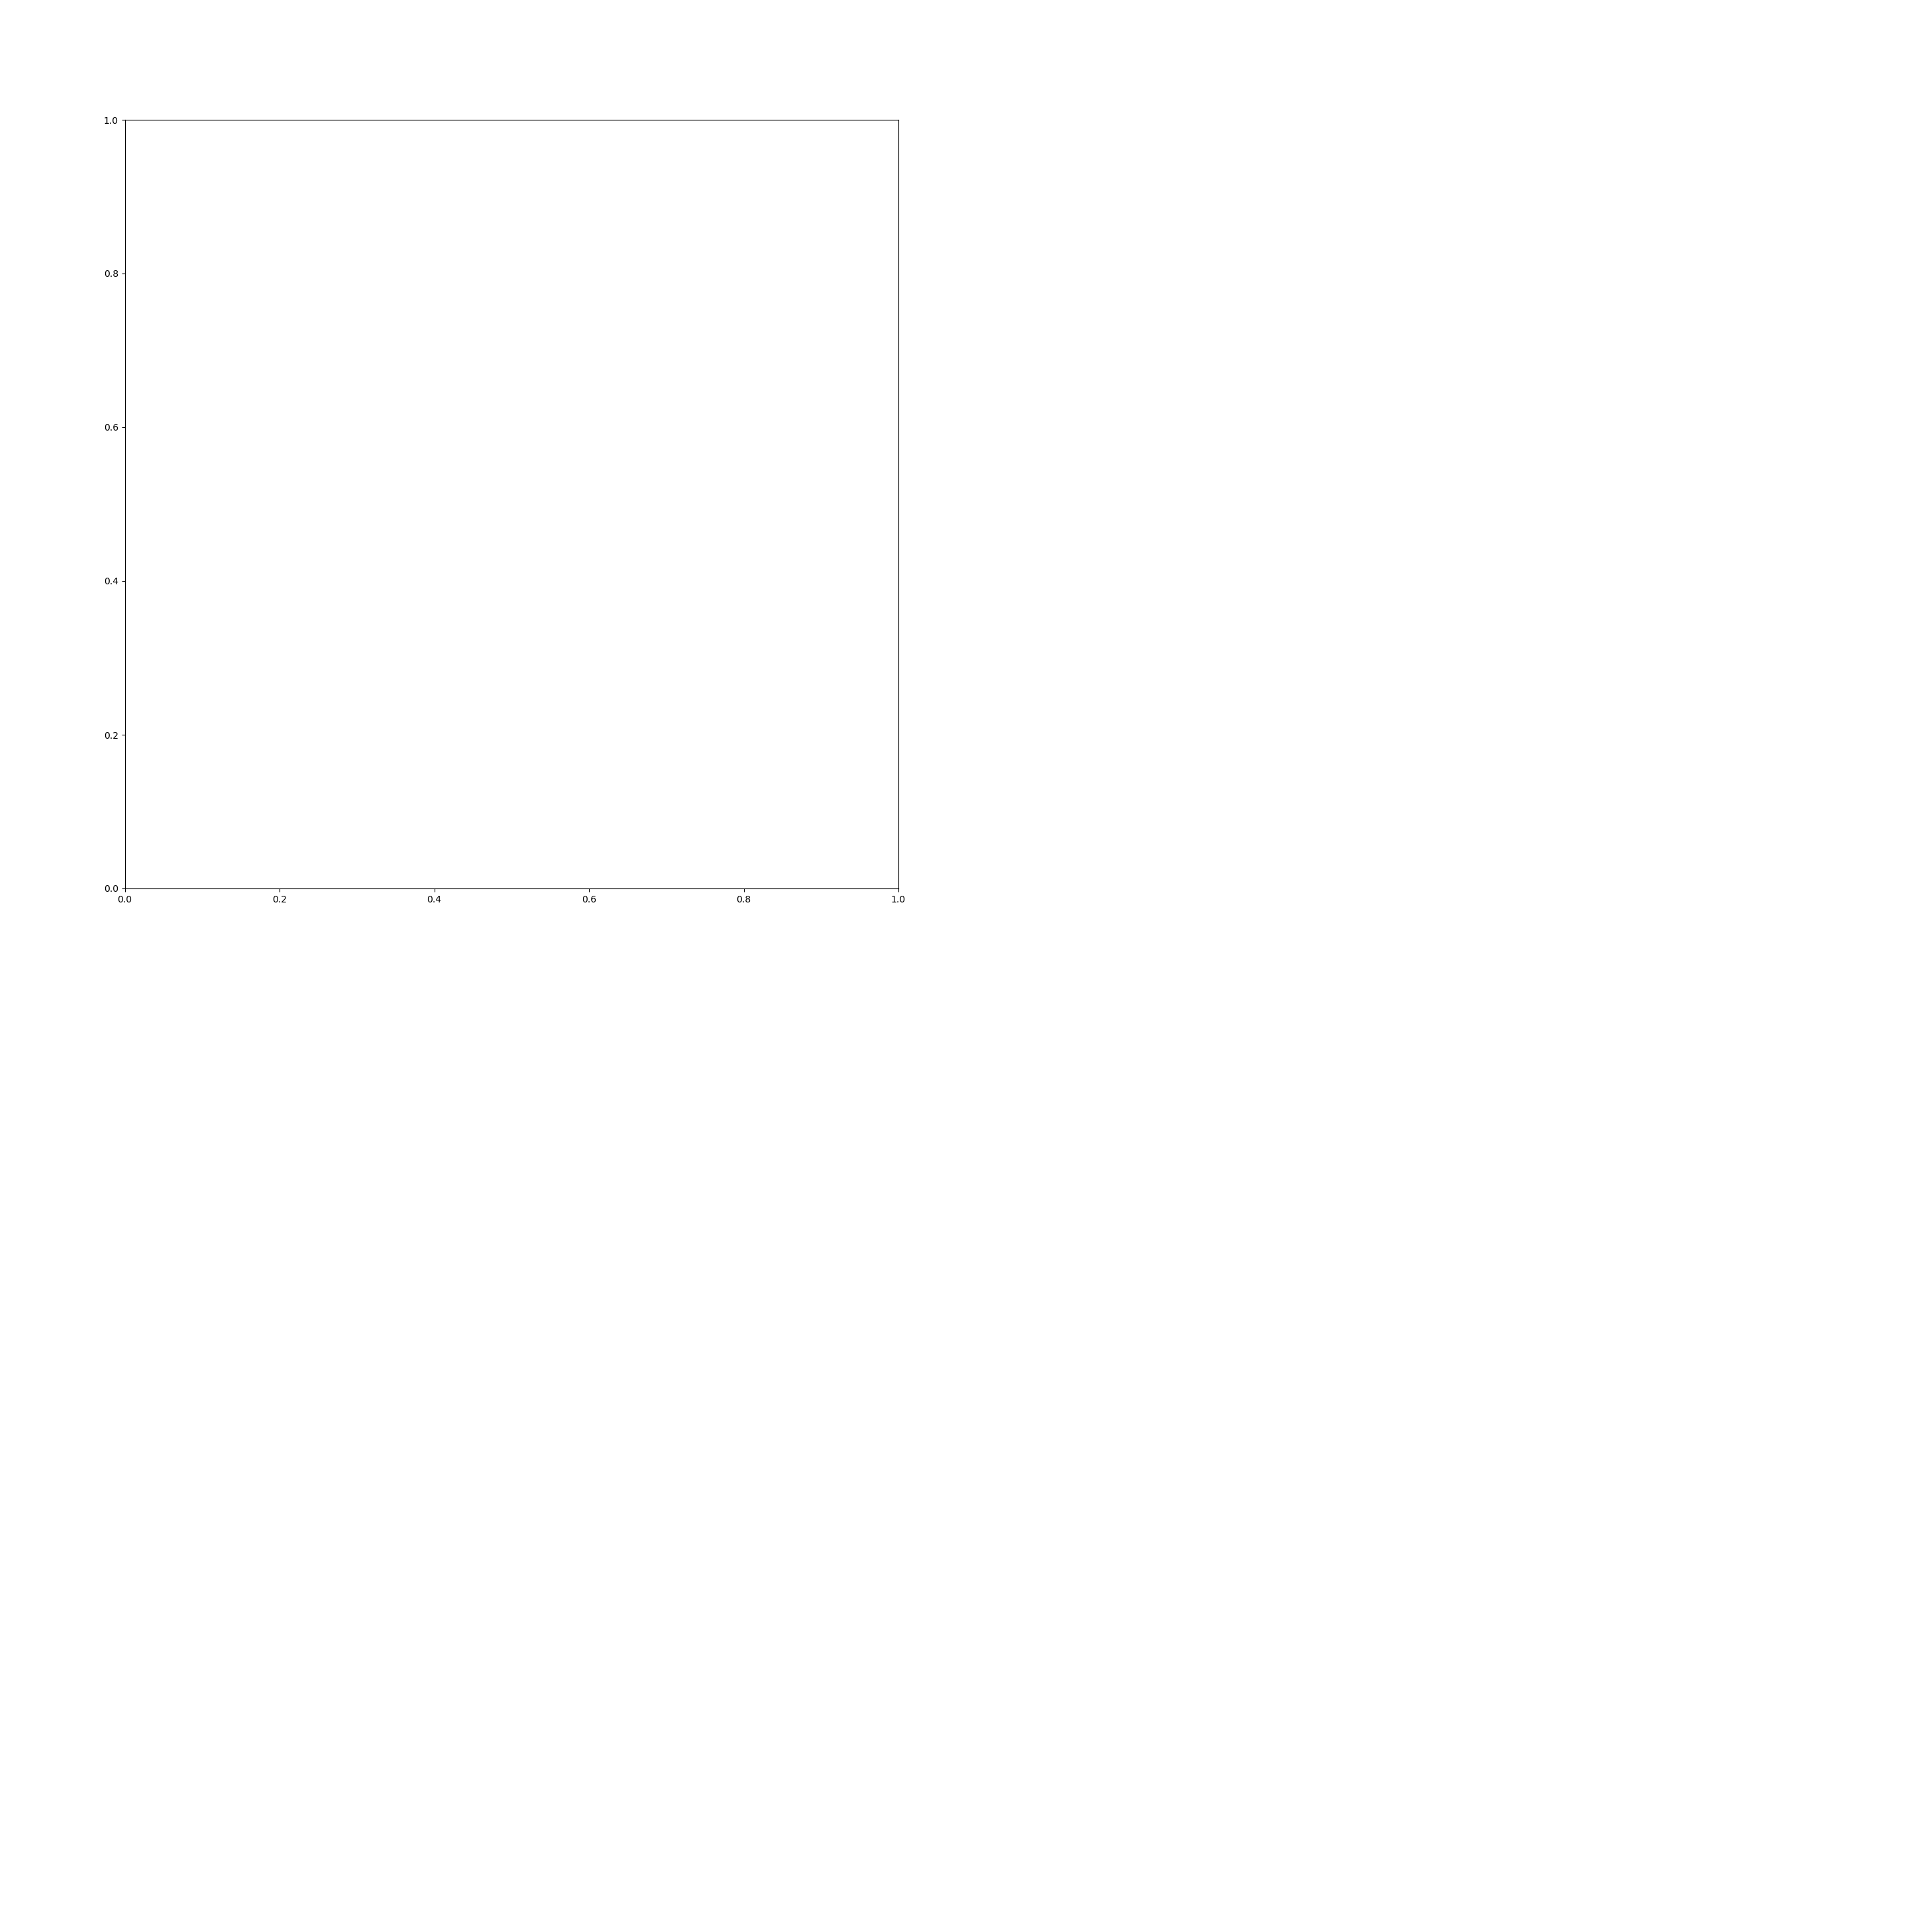

ValueError: 'c' argument has 2754 elements, which is inconsistent with 'x' and 'y' with size 92479.

In [70]:
plt.figure(figsize=(15,15))
plt.scatter(Xs_reduce[:,0], Xs_reduce[:,1], c=model.labels_)

In [57]:
%matplotlib notebook

<IPython.core.display.Javascript object>


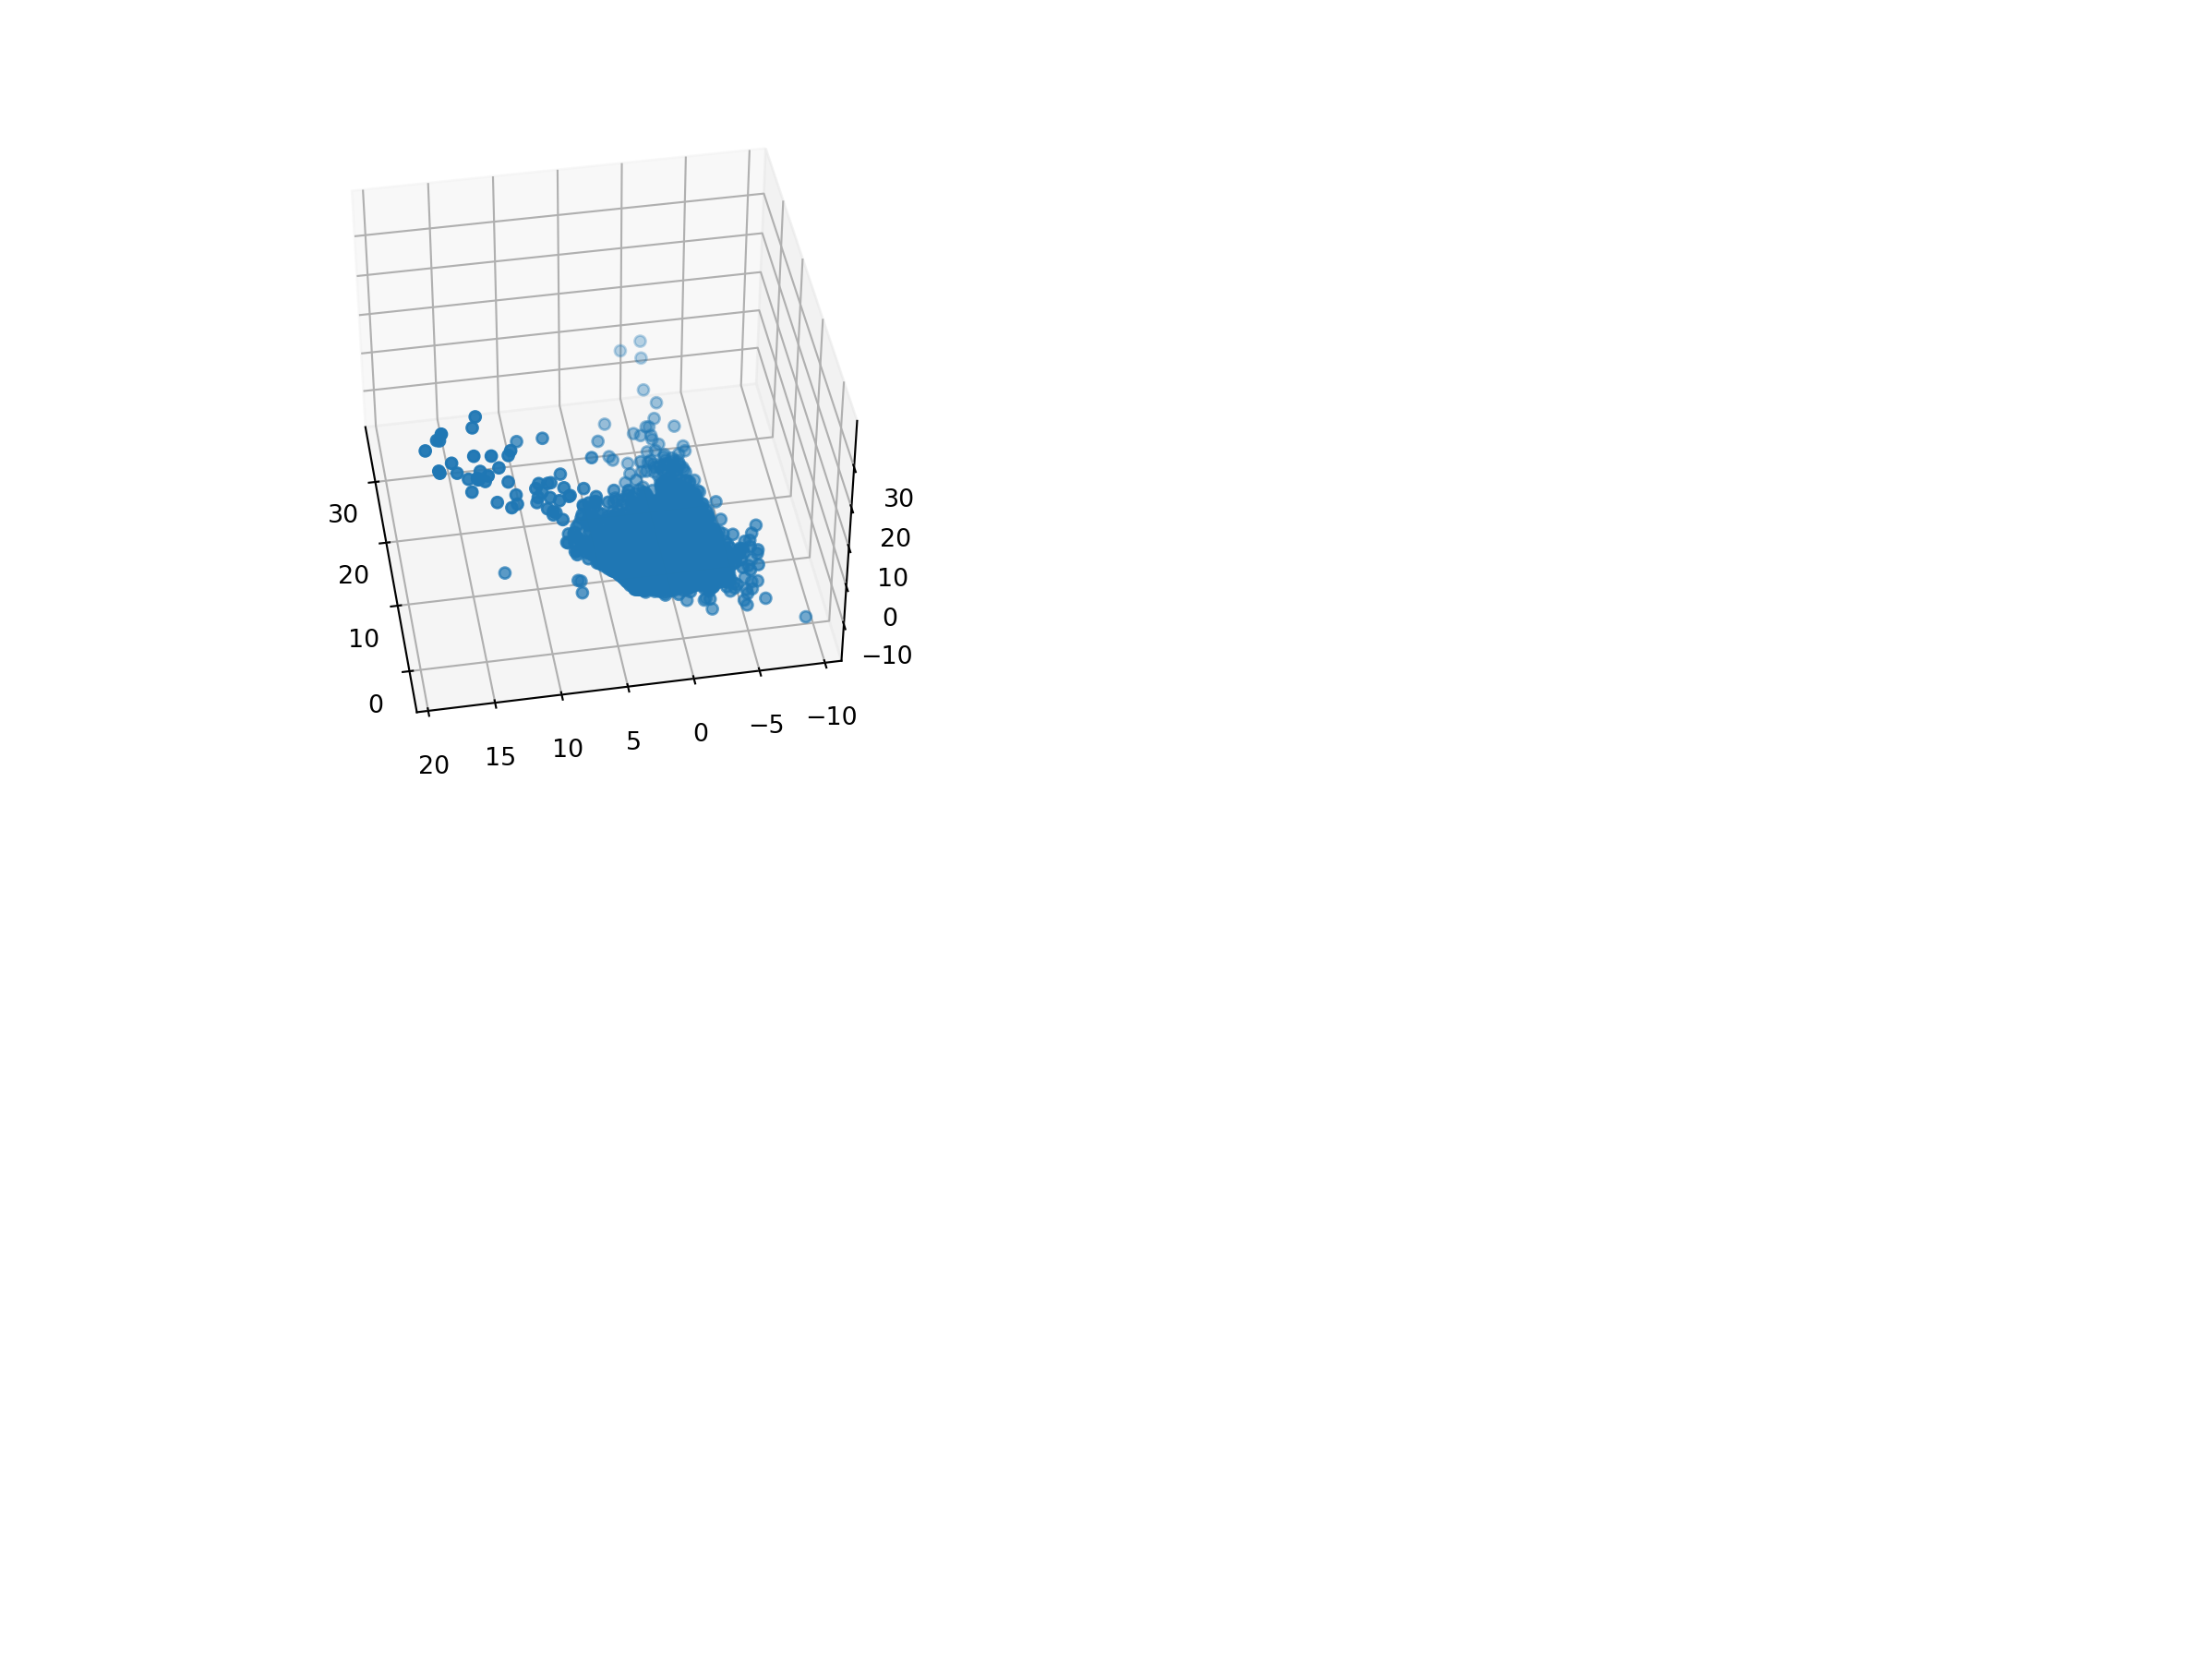

In [69]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# exemple d'application
ax.scatter(Xs_reduce[:, 0], Xs_reduce[:, 1], Xs_reduce[:,2])

<IPython.core.display.Javascript object>


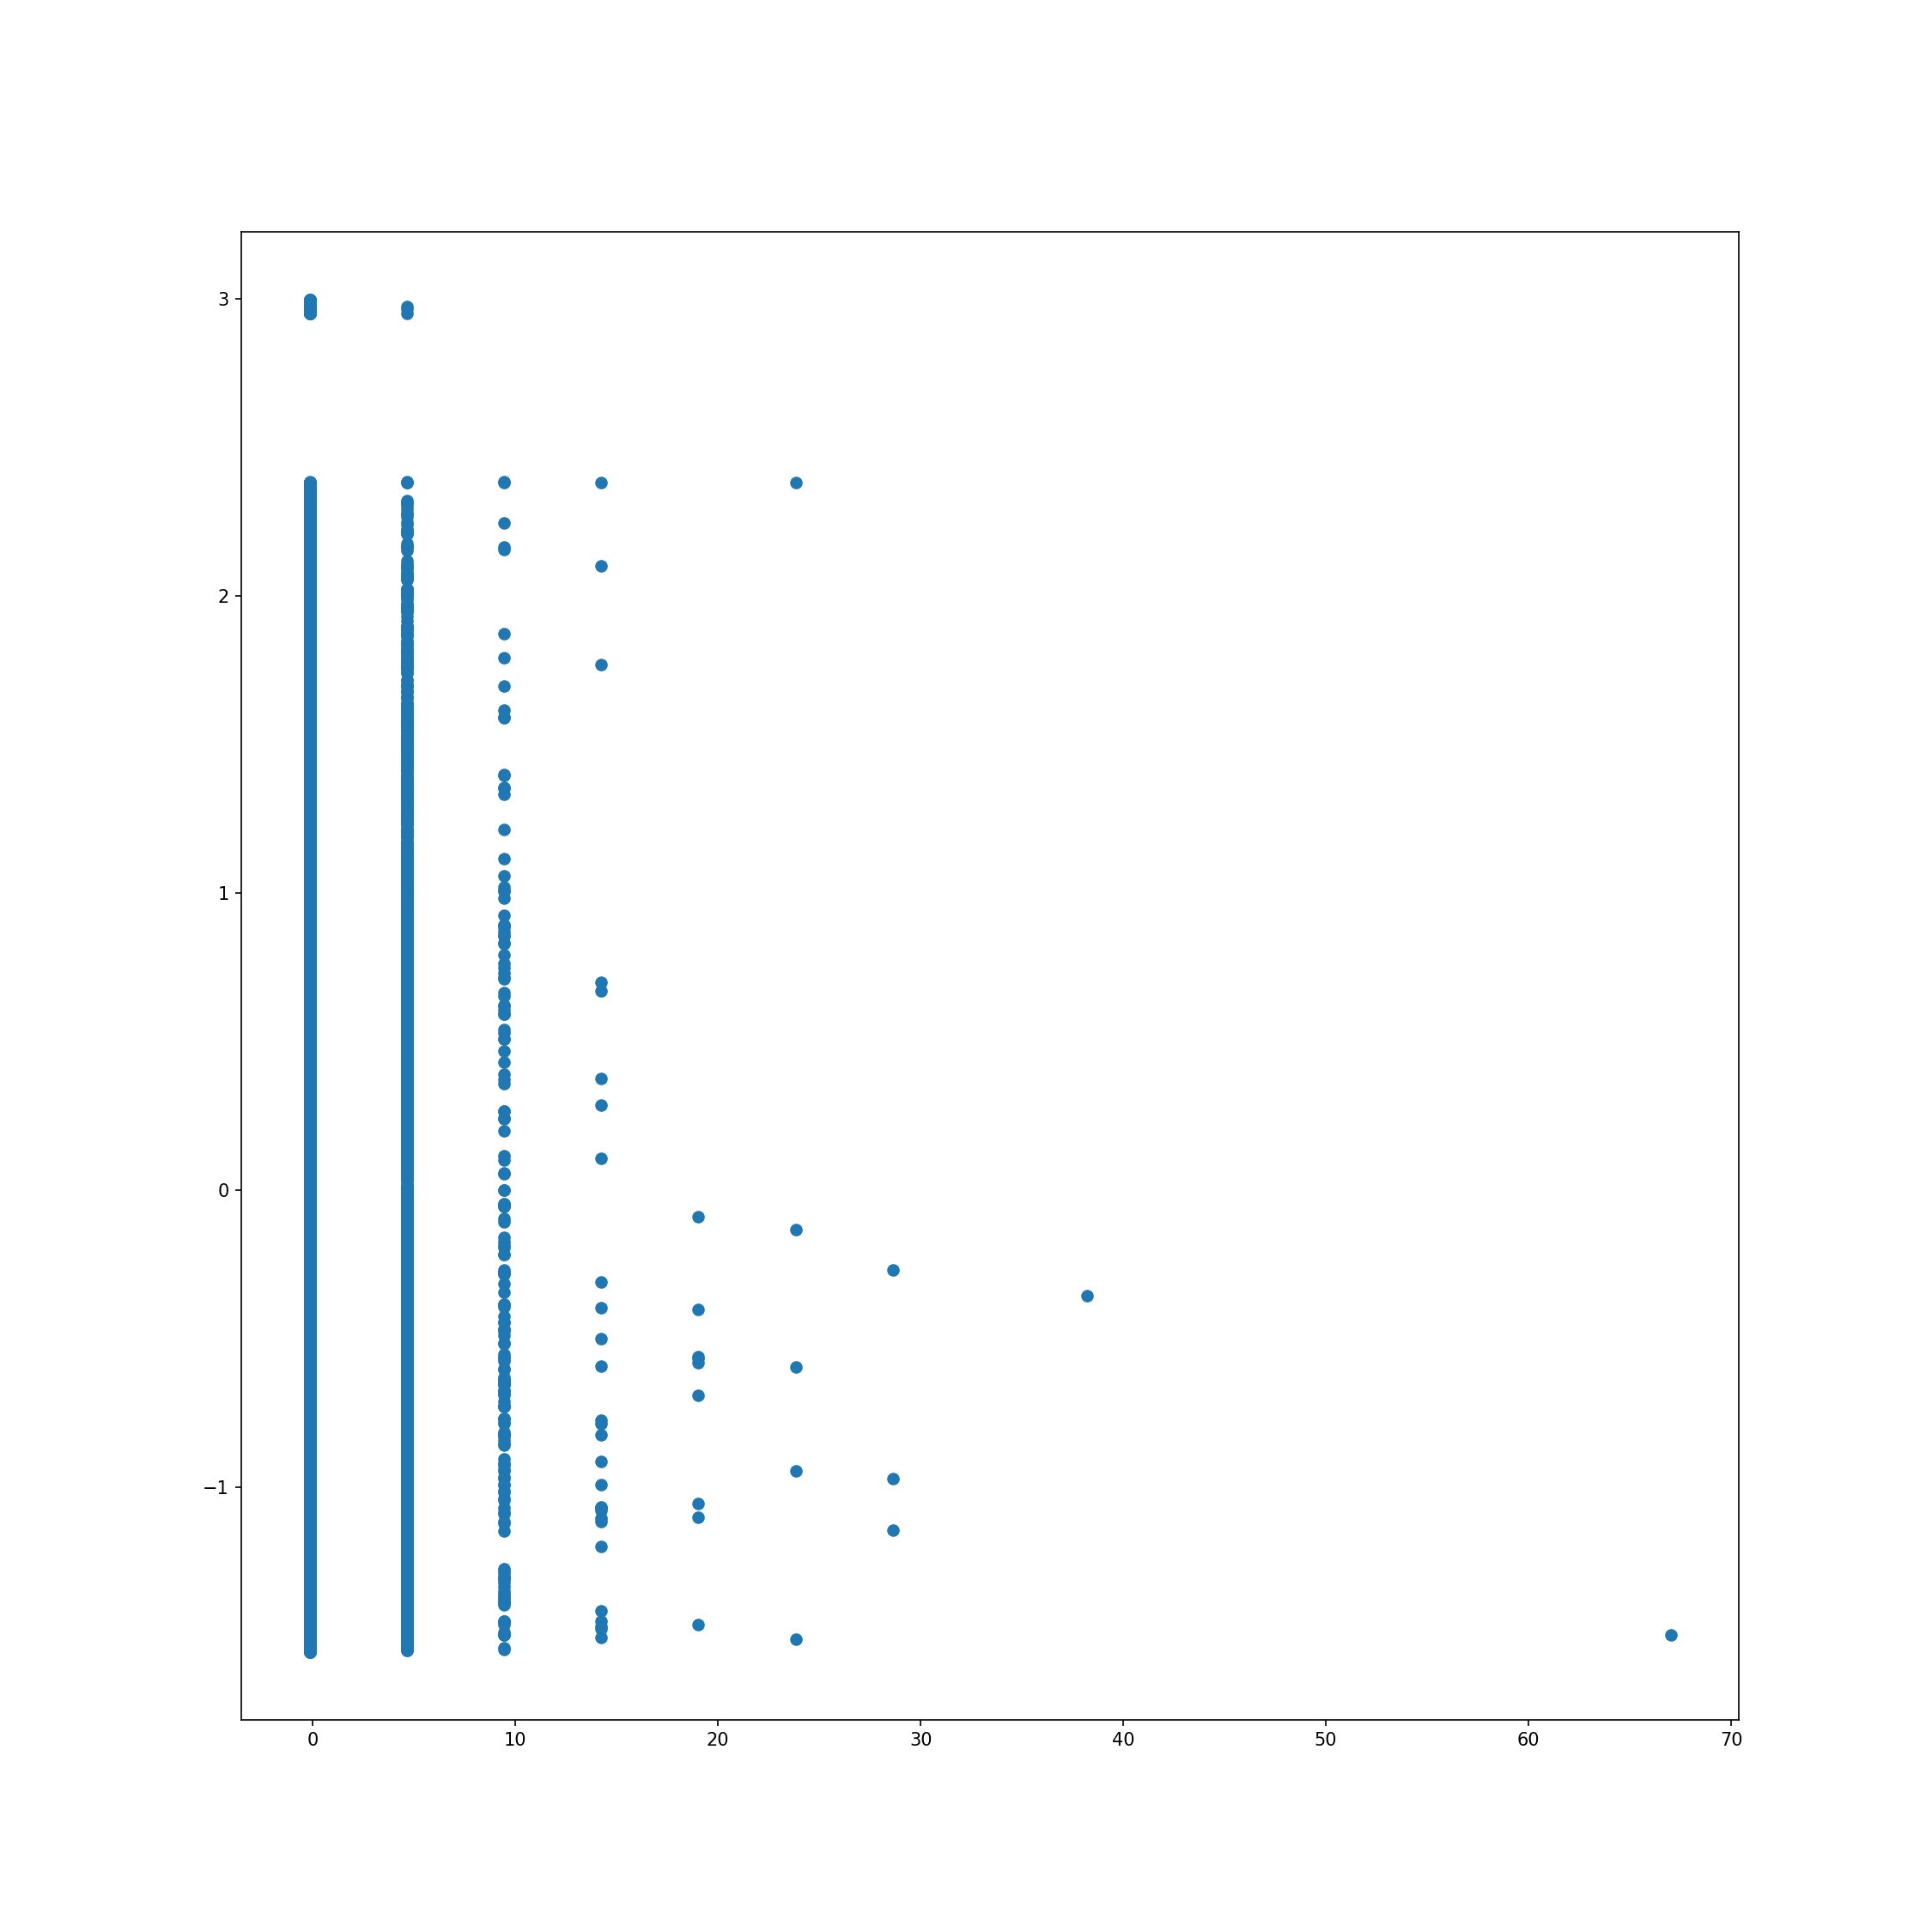

In [77]:
plt.figure(figsize=(15,15))
plt.scatter(Xrfm_std[:,0], Xrfm_std[:,1])

## nouveau test

### KMeans

In [41]:
scoret = []
inertiat = []
n_clu = range(2,10)
for i in tqdm(n_clu):
    model = KMeans(n_clusters=i)
    model.fit(Xt_std)
    scoret.append(silhouette_score(Xt_std, model.labels_))
    inertiat.append(model.inertia_)

100%|██████████| 8/8 [02:13<00:00, 16.65s/it]


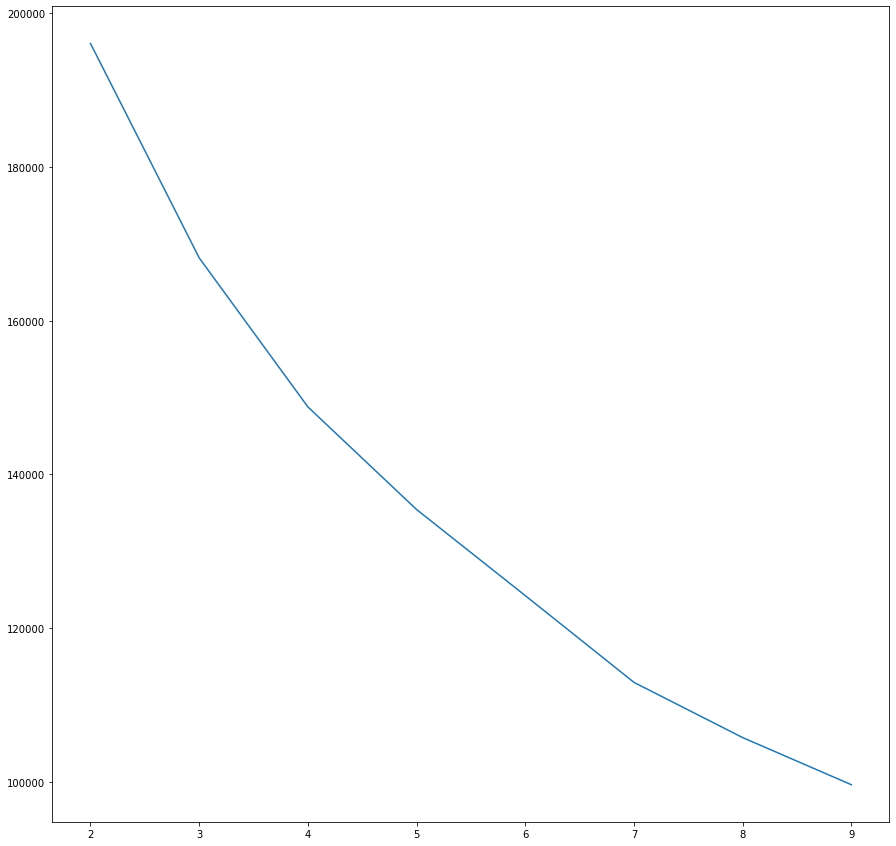

In [42]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, inertiat)

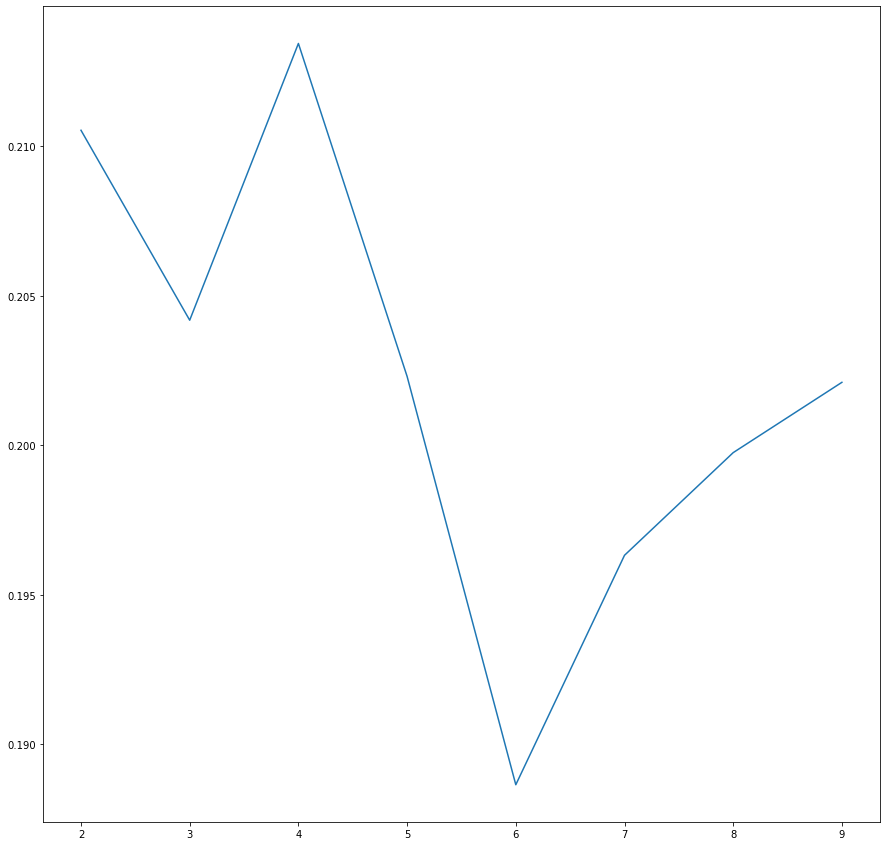

In [43]:
plt.figure(figsize=(15,15))
plt.plot(n_clu, scoret)

In [44]:
%matplotlib notebook

In [45]:
acp = PCA(n_components=3)
acp.fit(Xt_std)
Xt_reduce = acp.transform(Xt_std)

<IPython.core.display.Javascript object>


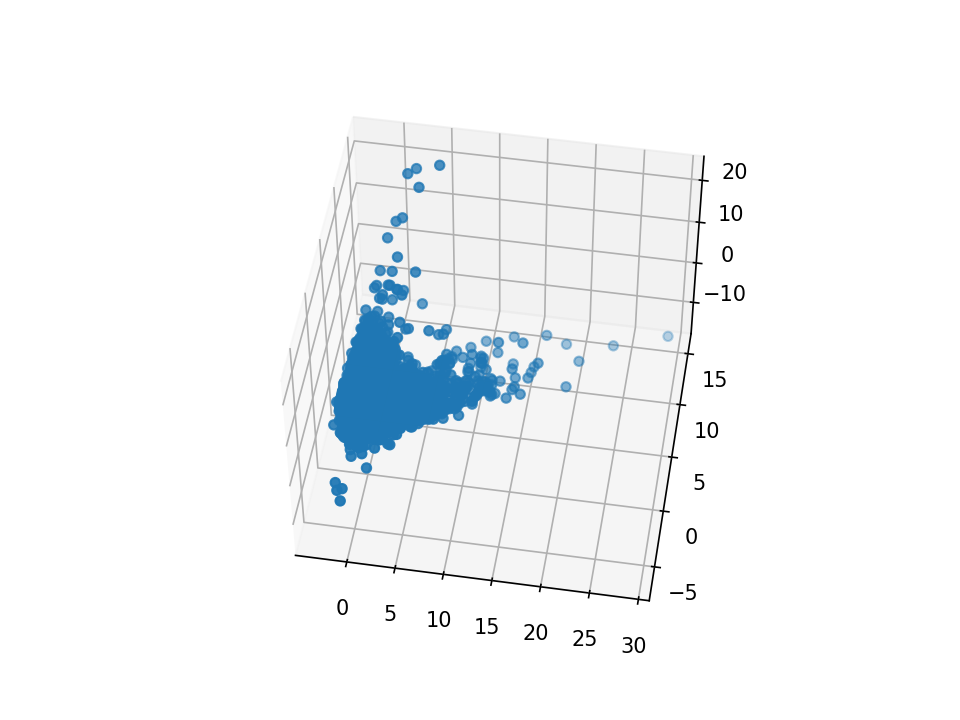

In [47]:
from mpl_toolkits.mplot3d import Axes3D
ax = plt.axes(projection='3d')

# exemple d'application
ax.scatter(Xt_reduce[:, 0], Xt_reduce[:, 1], Xt_reduce[:,2])